In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"]=(12,8)

In [4]:
data=pd.read_csv("../input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv")

In [5]:
data.head(1)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
job_id,17880.0,8940.500000,5161.655742,1.0,4470.75,8940.5,13410.25,17880.0
telecommuting,17880.0,0.042897,0.202631,0.0,0.00,0.0,0.00,1.0
has_company_logo,17880.0,0.795302,0.403492,0.0,1.00,1.0,1.00,1.0
has_questions,17880.0,0.491723,0.499945,0.0,0.00,0.0,1.00,1.0
fraudulent,17880.0,0.048434,0.214688,0.0,0.00,0.0,0.00,1.0


In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()/len(data)*100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

**Department, salary_range, company_profile, requirements, benefits, employment_type, required_experience, required_education, industry, function columns have very high percentage of missing value**

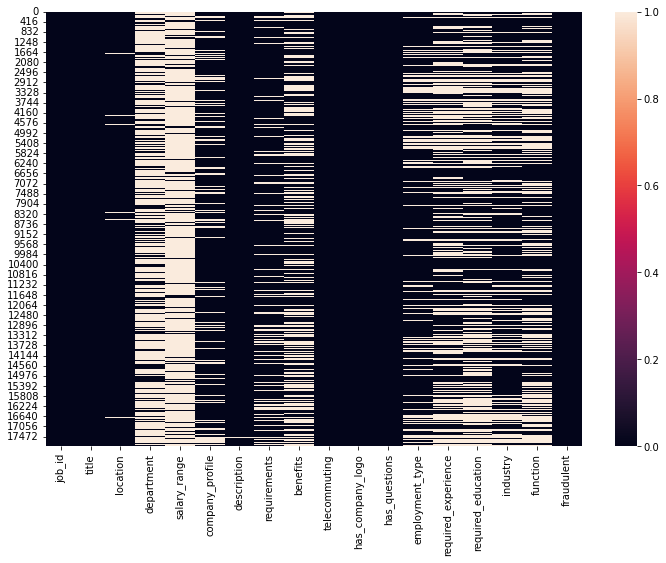

In [10]:
sns.heatmap(data.isnull());

In [11]:
text_data=data.select_dtypes(include="object")
text_data.drop(["location","salary_range"],axis=1,inplace=True)

text_col=text_data.columns

In [12]:
text_col

Index(['title', 'department', 'company_profile', 'description', 'requirements',
       'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function'],
      dtype='object')

**As text_col contains missing data replace them with empty string**

In [13]:
data[text_col]=data[text_col].replace(np.nan,"")

**data["text"] Containing all the information provided in job ads**

In [14]:
data["text"]=""

In [15]:
for col in text_data.columns:
    data["text"]=data["text"]+" "+data[col]

In [16]:
data["text"].iloc[0]

" Marketing Intern Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sou

**Creating feature that will tell whether information of particular type is provided or not**

In [17]:
def fea(text):
    if text=="":
        return 0
    else:
        return 1

In [18]:
for col in text_col:
    data[col]=data[col].apply(fea)

In [19]:
data.isnull().sum()/len(data)*100

job_id                  0.000000
title                   0.000000
location                1.935123
department              0.000000
salary_range           83.959732
company_profile         0.000000
description             0.000000
requirements            0.000000
benefits                0.000000
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type         0.000000
required_experience     0.000000
required_education      0.000000
industry                0.000000
function                0.000000
fraudulent              0.000000
text                    0.000000
dtype: float64

In [20]:
data.drop(["salary_range","job_id"],axis=1,inplace=True)

**As the remaining missing values are less (2%) we drop them**

In [21]:
data.dropna(axis=0,inplace=True)

In [22]:
fake=data[data["fraudulent"]==0]["fraudulent"].count()
real=data[data["fraudulent"]==1]["fraudulent"].count()

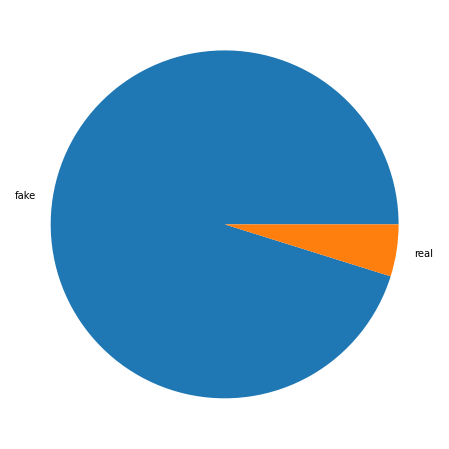

In [23]:
plt.pie([fake,real],labels=["fake","real"]);

In [24]:
data["text_len"]=data["text"].str.len()

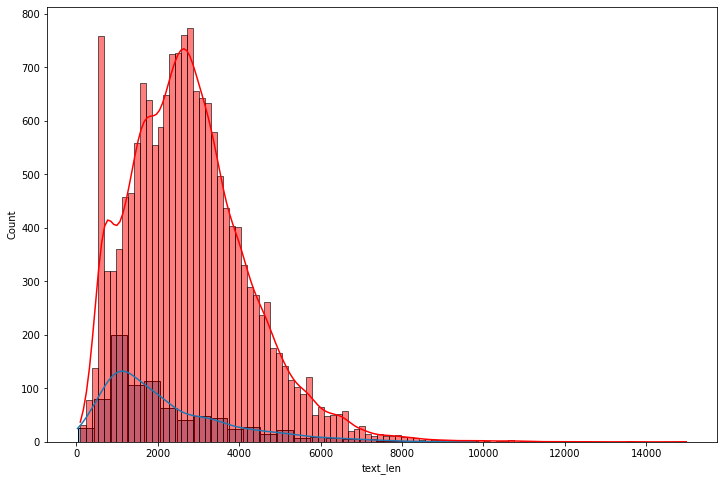

In [25]:
sns.histplot(x=data[data["fraudulent"]==1]["text_len"],kde=True)
sns.histplot(x=data[data["fraudulent"]==0]["text_len"],kde=True,color="red");

**Fake job have less information then real job**

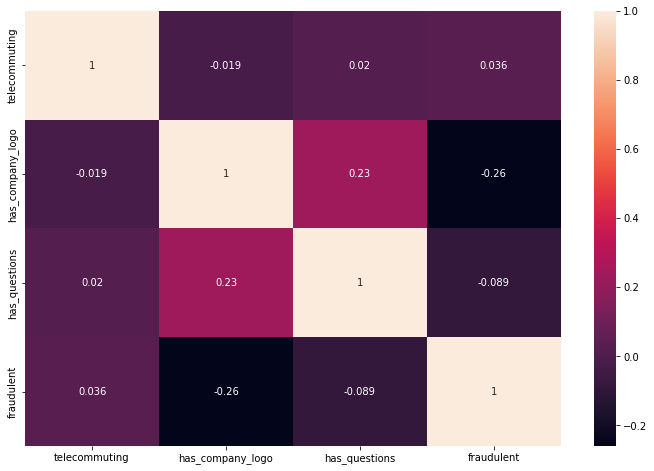

In [26]:
sns.heatmap(data[["telecommuting","has_company_logo","has_questions","fraudulent"]].corr(),annot=True);

**We see has_company_logo is strongly correlated with fradulent columns**

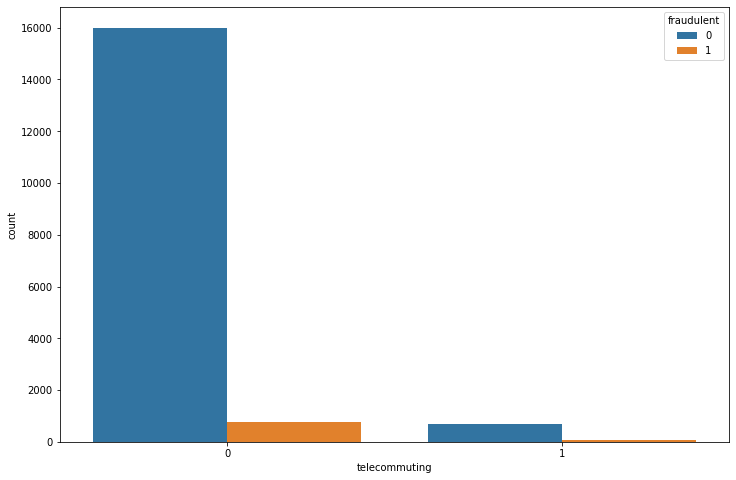

In [27]:
sns.countplot(x="telecommuting",hue="fraudulent",data=data);

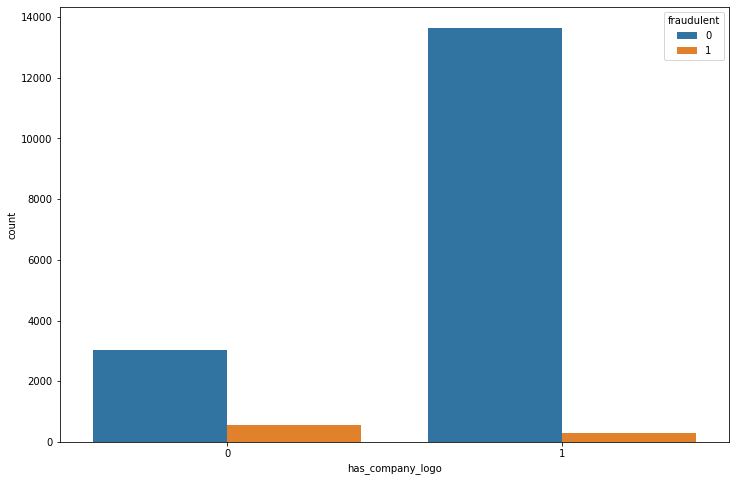

In [28]:
sns.countplot(x="has_company_logo",hue="fraudulent",data=data);

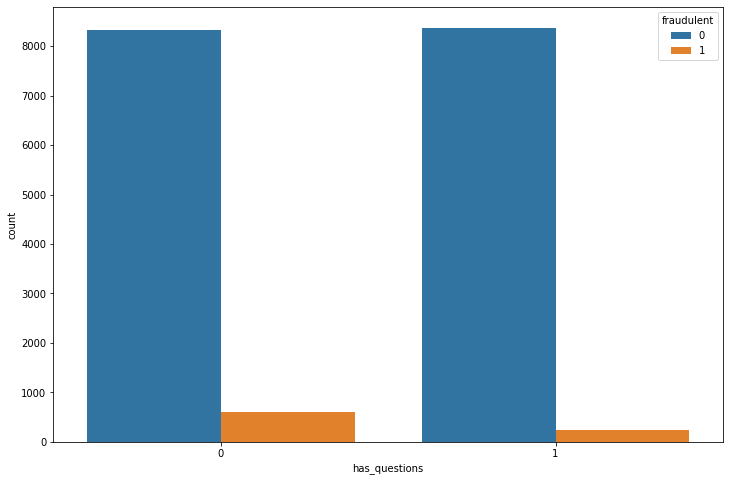

In [29]:
sns.countplot(x="has_questions",hue="fraudulent",data=data);

In [30]:
features=['title','department', 'company_profile', 'requirements','description',
          'benefits', 'employment_type', 'required_experience',
          'required_education', 'industry', 'function','fraudulent']

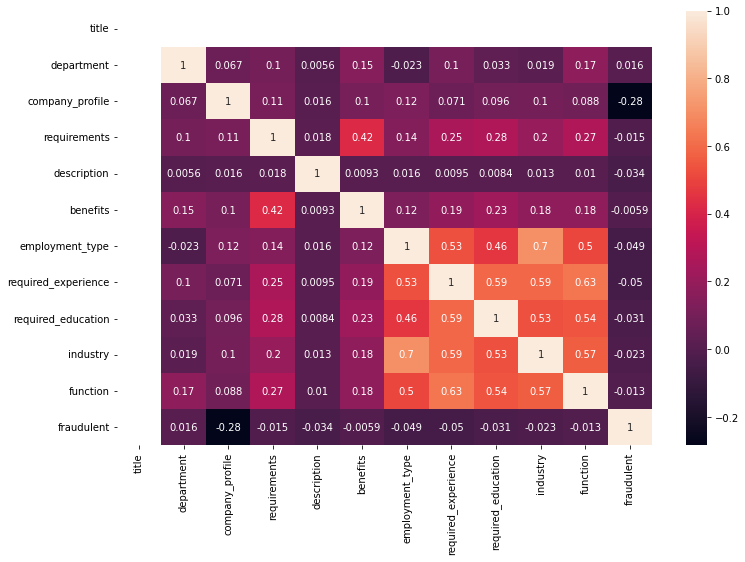

In [31]:
sns.heatmap(data[features].corr(),annot=True);

**Company profile information is strongly correlated with the job label, while others don't have significant correlation and therefore droping them**

In [32]:
drop_col=['title','department', 'description', 'requirements',
          'benefits', 'employment_type', 'required_experience',
          'required_education', 'industry', 'function']

data.drop(drop_col,axis=1,inplace=True)

**Location information: using only country code**

In [33]:
def code(string):
    return string.split(",")[0]

In [34]:
data["country"]=data["location"].apply(code)

In [35]:
p=data.groupby("country")["country"].count().sort_values(ascending=False)

In [36]:
p[:5]

country
US    10656
GB     2384
GR      940
CA      457
DE      383
Name: country, dtype: int64

In [37]:
grp=["US","GB","GR","CA","DE"]

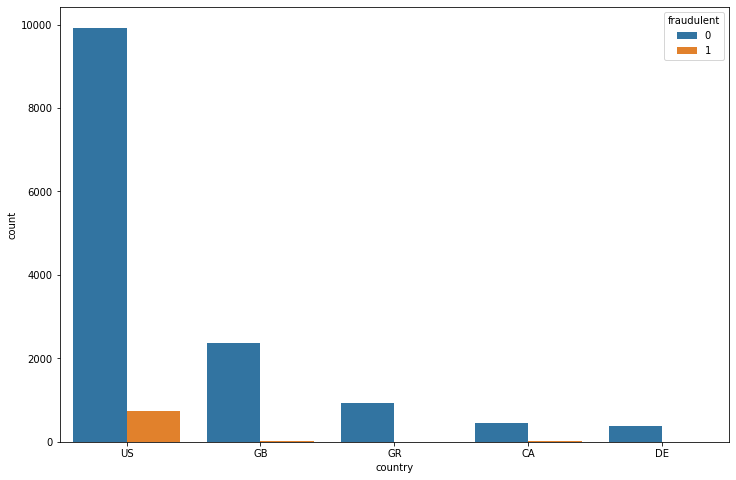

In [38]:
sns.countplot(x="country",hue="fraudulent",data=data[data["country"].isin(grp)],order=grp);

**Considering only for US**

In [39]:
data=data[data["country"]=="US"]
data.drop(columns=["country","location"],axis=1,inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 0 to 17877
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_profile   10656 non-null  int64 
 1   telecommuting     10656 non-null  int64 
 2   has_company_logo  10656 non-null  int64 
 3   has_questions     10656 non-null  int64 
 4   fraudulent        10656 non-null  int64 
 5   text              10656 non-null  object
 6   text_len          10656 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 666.0+ KB


In [41]:
data.reset_index(drop=True,inplace=True)

**Text Cleaning**

**Importing libraries for cleaning textual data**

In [42]:
import re
import nltk

In [43]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

In [44]:
stop=set(stopwords.words("english"))

In [45]:
data["text"].iloc[0]

" Marketing Intern Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sou

In [46]:
def clean(text):
    
    text=text.lower()
    obj=re.compile(r"<.*?>")                     #removing html tags
    text=obj.sub(r" ",text)
    obj=re.compile(r"https://\S+|http://\S+")    #removing url
    text=obj.sub(r" ",text)
    obj=re.compile(r"[^\w\s]")                   #removing punctuations
    text=obj.sub(r" ",text)
    obj=re.compile(r"\d{1,}")                    #removing digits
    text=obj.sub(r" ",text)
    obj=re.compile(r"_+")                        #removing underscore
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s{2,}")                    #removing multiple spaces
    text=obj.sub(r" ",text)
   
    
    stemmer = SnowballStemmer("english")
    text=[stemmer.stem(word) for word in text.split() if word not in stop]
    
    return " ".join(text)

In [47]:
data["text"]=data["text"].apply(clean)

In [48]:
data["text"].iloc[0]

'market intern market food creat groundbreak award win cook site support connect celebr home cook give everyth need one place top editori busi engin team focus use technolog find new better way connect peopl around specif food interest offer superb high curat inform food cook attract talent home cook contributor countri also publish well known profession like mario batali gwyneth paltrow danni meyer partnership whole food market random hous food name best food websit jame beard foundat iacp featur new york time npr pando daili techcrunch today show locat chelsea new york citi food fast grow jame beard award win onlin food communiti crowd sourc curat recip hub current interview full part time unpaid intern work small team editor execut develop new york citi headquart reproduc repackag exist food content number partner site huffington post yahoo buzzfe various content manag systemsresearch blog websit provis food affili programassist day day affili program support screen affili assist af

**Visualizatioins**

In [49]:
from wordcloud import WordCloud,STOPWORDS
from collections import defaultdict
from nltk import ngrams

In [50]:
def generate(text,ngram):
    n_grams=ngrams(word_tokenize(text),ngram)
    grams=[" ".join(val) for val in n_grams]
    return grams

In [51]:
real_job=data[data["fraudulent"]==1]["text"].values

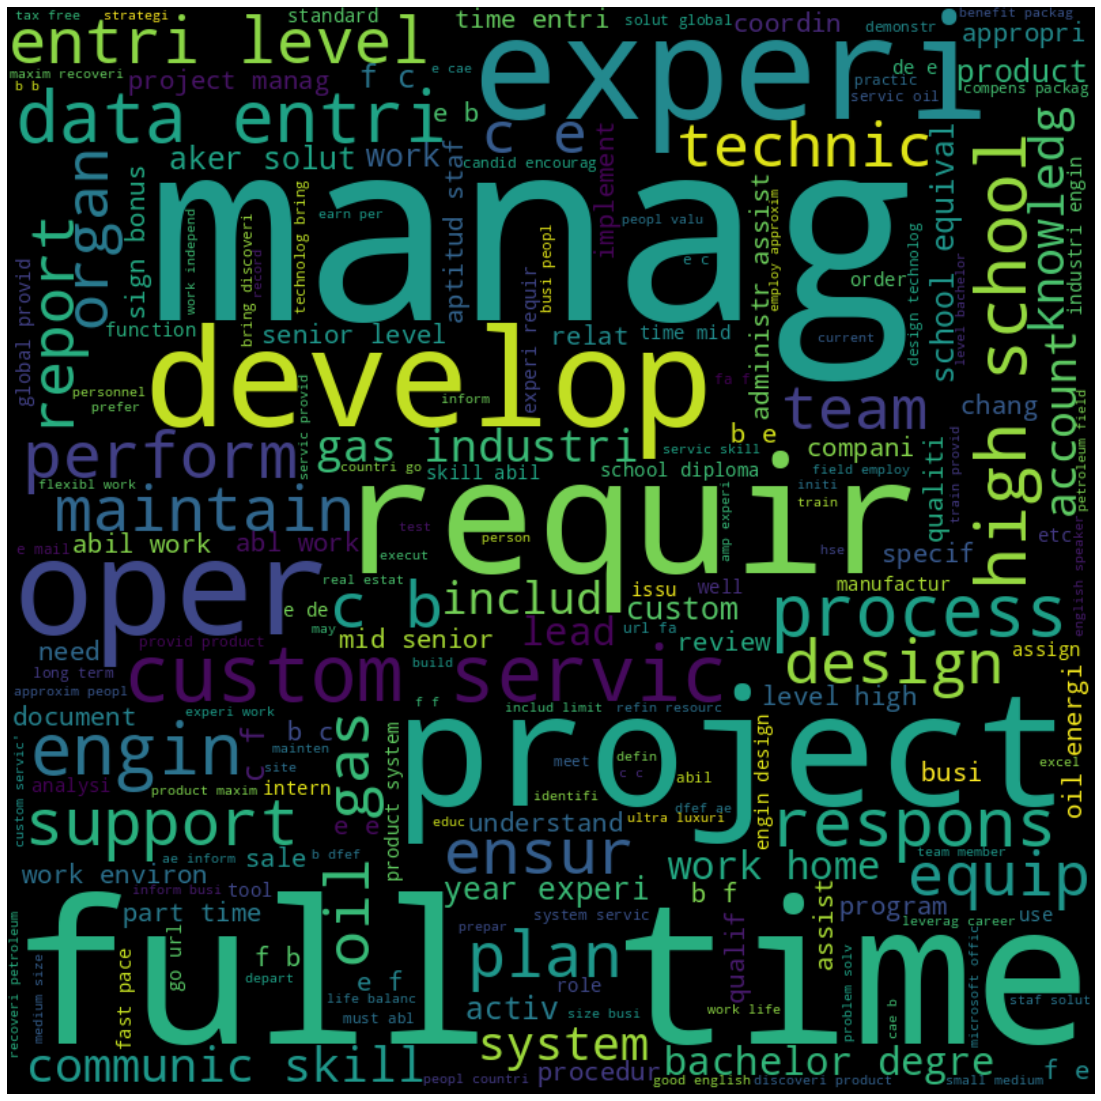

In [52]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = STOPWORDS).generate(str(real_job))

fig = plt.figure(figsize = (30,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off');

<BarContainer object of 10 artists>

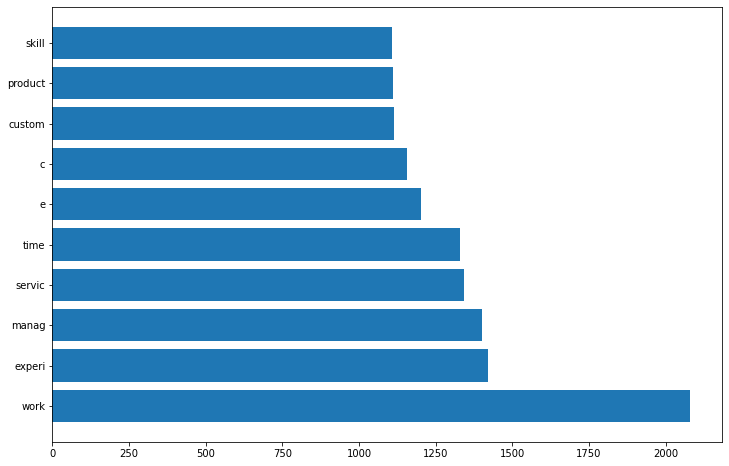

In [53]:
pos_1=defaultdict(int)

for text in data[data["fraudulent"]==1]["text"]:
    for words in generate(text,1):
        pos_1[words]+=1
        
pos=pd.DataFrame(sorted(pos_1.items(),key=lambda x: x[1],reverse=True))
plt.barh(pos[0][:10],pos[1][:10])

**There are single letter characters in text that will be taken care by tfidf token_parameter**

In [54]:
fake_job=data[data["fraudulent"]==0]["text"].values

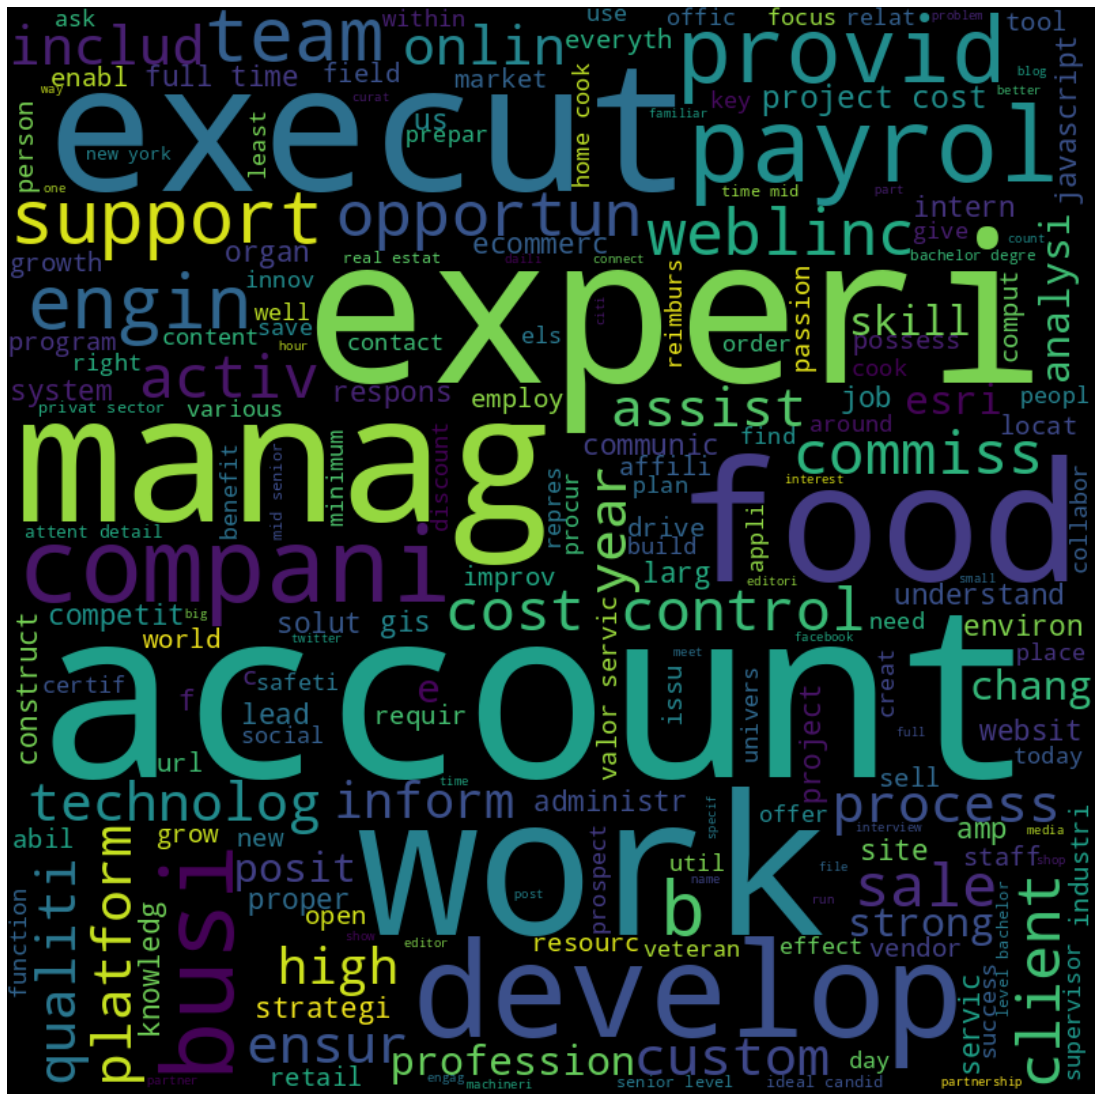

In [55]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = STOPWORDS).generate(str(fake_job))

fig = plt.figure(figsize = (30,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off');

<BarContainer object of 10 artists>

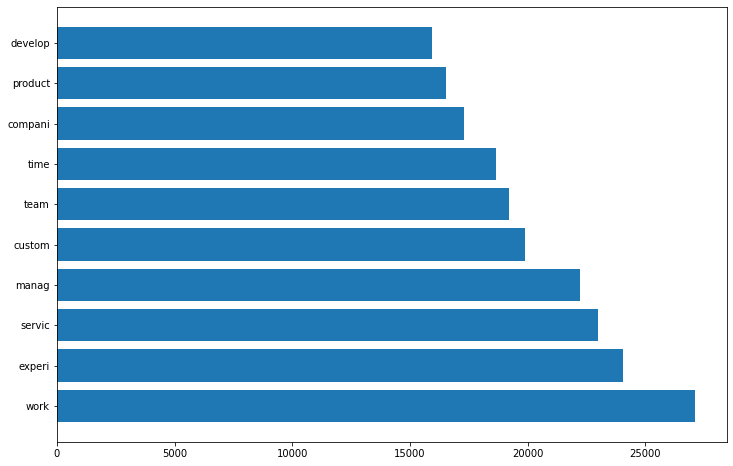

In [56]:
neg_1=defaultdict(int)

for text in data[data["fraudulent"]==0]["text"].values:
    for words in generate(text,1):
        neg_1[words]+=1
        
neg=pd.DataFrame(sorted(neg_1.items(),key=lambda x: x[1],reverse=True))
plt.barh(neg[0][:10],neg[1][:10])

**Preprocessing**

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
vectorizer=TfidfVectorizer(strip_accents='unicode',
                           analyzer='word',
                           ngram_range=(1, 2),
                           max_features=7000,
                           smooth_idf=True,
                           sublinear_tf=True)

vectorizer.fit(data["text"])
X = vectorizer.transform(data["text"])

In [59]:
X.shape

(10656, 7000)

In [60]:
y=data["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Baseline Model**

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,classification_report,confusion_matrix

In [62]:
model=GaussianNB()
model.fit(X_train.toarray(),y_train)
y_pred=model.predict(X_test.toarray())

In [63]:
print(f"F1 score: {f1_score(y_test,y_pred)}")

F1 score: 0.7310344827586207


In [64]:
print(f"classification_report:\n {classification_report(y_test,y_pred)}")

classification_report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1981
           1       0.76      0.70      0.73       151

    accuracy                           0.96      2132
   macro avg       0.87      0.84      0.86      2132
weighted avg       0.96      0.96      0.96      2132



In [65]:
print(f"confusion_matrix:\n {confusion_matrix(y_test,y_pred)}")

confusion_matrix:
 [[1948   33]
 [  45  106]]


**Xgboost**

In [66]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

**Using without hyperparameter tuning**

In [67]:
model=XGBClassifier()
model.fit(X_train.toarray(),y_train)
y_pred=model.predict(X_test.toarray())

[15:58:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [68]:
print(f"F1 score: {f1_score(y_test,y_pred)}")

F1 score: 0.8377358490566038


In [69]:
print(f"classification_report:\n {classification_report(y_test,y_pred)}")

classification_report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1981
           1       0.97      0.74      0.84       151

    accuracy                           0.98      2132
   macro avg       0.98      0.87      0.91      2132
weighted avg       0.98      0.98      0.98      2132



In [70]:
print(f"confusion_matrix:\n {confusion_matrix(y_test,y_pred)}")

confusion_matrix:
 [[1978    3]
 [  40  111]]


**Hyperparameter tuning**

In [71]:
model=XGBClassifier( learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,
                     gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',
                     nthread=2, use_label_encoder=False)

In [72]:
xgb_param = model.get_xgb_params()
xgtrain = xgb.DMatrix(X_train.toarray(), label=y_train.values)

early_stopping_rounds=50

cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], 
                  nfold=3,metrics='auc', early_stopping_rounds=early_stopping_rounds)

model.set_params(n_estimators=cvresult.shape[0])

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=173, n_jobs=None, nthread=2, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=0.8,
              tree_method=None, use_label_encoder=False,
              validate_parameters=None, verbosity=None)

In [73]:
esti=cvresult.shape[0]

**Tree estimator Optimization**

In [74]:
param_test1 = {"max_depth":range(3,10,2),
               "min_child_weight":range(1,6,2),
               "gamma":range(1,6,2)}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=esti, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=1, seed=27),
                        param_grid = param_test1, scoring='roc_auc',n_jobs=2, cv=3)

gsearch1.fit(X_train.toarray(),y_train.values)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode

[16:13:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:24:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode

[22:20:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[19:41:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:01:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old b

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode


[19:54:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:13:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:17:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old b

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=173, n_jobs=None, nthread=1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [75]:
best_param=gsearch1.best_params_

In [76]:
gsearch1.best_score_

0.9817619385040327

In [77]:
model=gsearch1.best_estimator_
y_pred=model.predict(X_test.toarray())

In [78]:
print(f"F1 score: {f1_score(y_test,y_pred)}")

F1 score: 0.8185328185328187


In [79]:
print(f"classification_report:\n {classification_report(y_test,y_pred)}")

classification_report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1981
           1       0.98      0.70      0.82       151

    accuracy                           0.98      2132
   macro avg       0.98      0.85      0.90      2132
weighted avg       0.98      0.98      0.98      2132



In [80]:
print(f"confusion_matrix:\n {confusion_matrix(y_test,y_pred)}")

confusion_matrix:
 [[1979    2]
 [  45  106]]
